<center><img src="images/redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [19]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")


In [20]:
#Aqui eu irei separar os arquivos e quero separar primeira o ano de lançamento de todo mundo

movie_release_year_1990 = netflix_df.loc[:,'release_year'] >= 1990

print(movie_release_year_1990)

#Usando o vetor booleano, vamo filtrar o df original

movie_filtered_1990 = netflix_df[movie_release_year_1990]

#Aqui vamos conferir se a data de lançamento esta sendo somente a partir de 1990

print(sorted(movie_filtered_1990.loc[:, 'release_year']))


0       True
1       True
2       True
3       True
4       True
        ... 
4807    True
4808    True
4809    True
4810    True
4811    True
Name: release_year, Length: 4812, dtype: bool
[1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1998, 1998, 1998, 

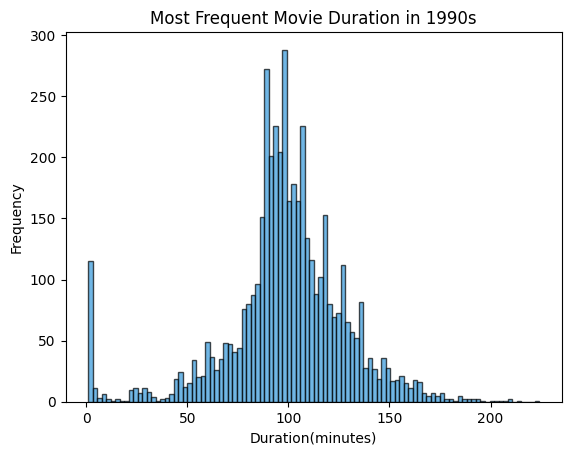

In [21]:
# Vamos começar com a analise de quais as frequencias de filmes mais frequentes

movies_duration_1990 = movie_filtered_1990.loc[:,'duration']


#A partir dai, vamos criar um histograma para ver a frequencia
xtext = 'Duration(minutes)'
ytext = 'Frequency'

titleText = 'Most Frequent Movie Duration in 1990s'
plt.hist(movies_duration_1990, bins=100, color="#3498db", edgecolor="black", alpha=0.7)

plt.xlabel(xtext)
plt.ylabel(ytext)
plt.title(titleText)


plt.show()


In [22]:

#Pegando o inteiro mais proximo da duration, usando .mode()
duration = movies_duration_1990.mode().iloc[0]
print("The most frequency duration is " + str(duration) + " minutes")

The most frequency duration is 93 minutes


In [23]:
#Agora, vamos trabalhar com os curtas, para ser um curta ele precisa ser menor do que 90 minutos, ter type = Movie e genre =

#Utilizando o dataframe que ja foi filtrado a partir de 1990's, vamos filtrar

movie_filter = movie_filtered_1990[movie_filtered_1990['release_year'] < 2000]
movie_filter = movie_filter[movie_filter['genre'] == 'Action']
movie_filter = movie_filter[movie_filter['duration'] <90]
movie_filter = movie_filter[movie_filter['type'] == 'Movie']

#Usando o vetor booleano, vamos agora filtrar


short_movie_count = movie_filter['show_id'].count()
print("the frequency of movie that reaches the criteries is " + str(short_movie_count))



the frequency of movie that reaches the criteries is 7


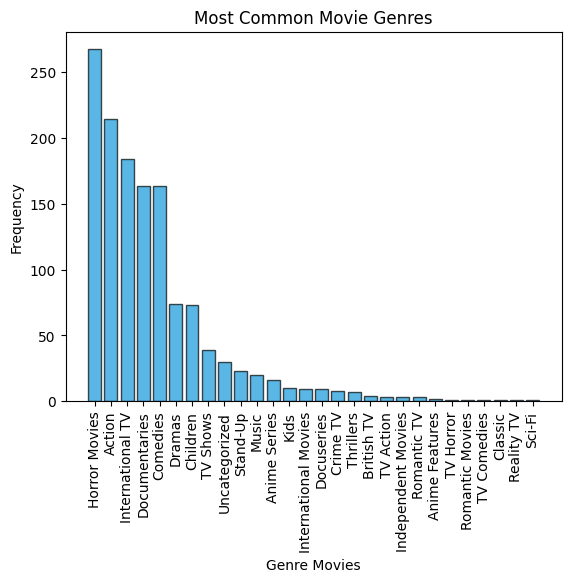

In [24]:

#Abaixo


short_movie = movie_filtered_1990[movie_filtered_1990['duration'] < 90]

short_movie_count_genre = short_movie['genre'].value_counts()
genre_label = short_movie['genre'].unique()

xtext= 'Genre Movies'
ytext = 'Frequency'
titleText = 'Most Common Movie Genres'

#Aqui nos vamos fazer um grafico de barras para relacionar os generos e a quantidade
plt.bar(genre_label, short_movie_count_genre, color="#1498db", edgecolor="black", alpha=0.7)

#Vamos também estilizar um pouco nosso grafico
plt.xticks(rotation=90)
plt.xlabel(xtext)
plt.ylabel(ytext)
plt.title(titleText)


plt.show()



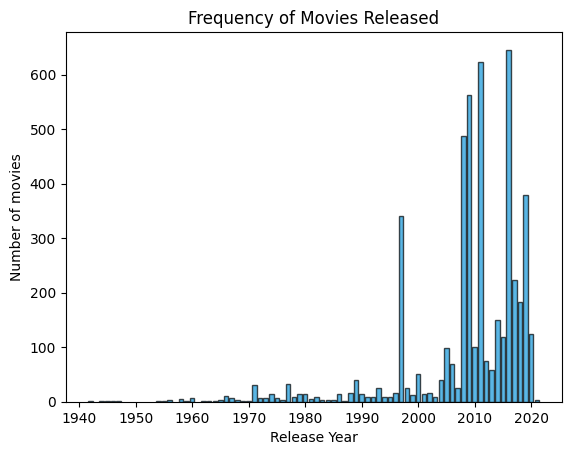

In [25]:
#Agora, vamos contar o numero de lançamento de filmes por ano

movies_release_by_year = netflix_df['release_year'].value_counts()

# print(movies_release_by_year)

xtext= 'Release Year'
ytext = 'Number of movies'
titleText = 'Frequency of Movies Released'

year_label = netflix_df['release_year'].unique()
plt.bar(year_label,movies_release_by_year, color="#1498db", edgecolor="black", alpha=0.7)
plt.xlabel(xtext)
plt.ylabel(ytext)
plt.title(titleText)

plt.show()
